In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Data was cleaned by removing columns with URLs and all NaNs 
mpv_df = pd.read_csv("MPV_Data_Cleaned.csv")
mpv_df.head()

,name,age,gender,race,date,year,month,day,street_address,city,...,wapo_threat_level,wapo_flee,wapo_body_camera,encounter_type,initial_reason,officer_names,call_for_service,tract,latitude,longitude
0,Lamar A. Davis,18.0,Male,Black,8/28/2022,2022,8,28,23 Orford Court,Bangor Charter Township,...,Sudden Threatening Movement,Not Fleeing,No,Part 1 Violent Crime,Murder,Christopher VanHorn,Yes,NaN,43.627941,-83.920497
1,Brian Underwood,47.0,Male,Unknown race,8/28/2022,2022,8,28,Tarawa Drive,Sarasota,...,Brandished Weapon,Not Fleeing,NaN,Domestic Disturbance,Domestic Disturbance,NaN,Yes,NaN,27.340000,-82.530000
2,Samuel Paul Ranson,50.0,Male,White,8/27/2022,2022,8,27,100 block of East Point Drive,Charleston,...,Attack,Foot,No,Part 1 Violent Crime,wanted person,"Clendenin, Childress",Yes,1100.0,38.333526,-81.586713
3,Name Withheld,NaN,Female,Unknown race,8/27/2022,2022,8,27,2500 block of Del Paso Boulevard,Sacramento,...,Attack,Foot,Yes,Part 1 Violent Crime,assault,NaN,Yes,NaN,38.610000,-121.450000
4,Christopher Rudolph,39.0,Male,White,8/27/2022,2022,8,27,"Highway 47, just south of Richwoods",Richwoods,...,Brandished Weapon,Not Fleeing,NaN,Other Non-Violent Offense,Disturbance,NaN,Yes,NaN,38.170000,-90.810000


White                                   4585
Black                                   2672
Hispanic                                1874
Unknown race                            1076
Asian                                    152
Native American                          143
Native Hawaiian and Pacific Islander      60
Name: race, dtype: int64

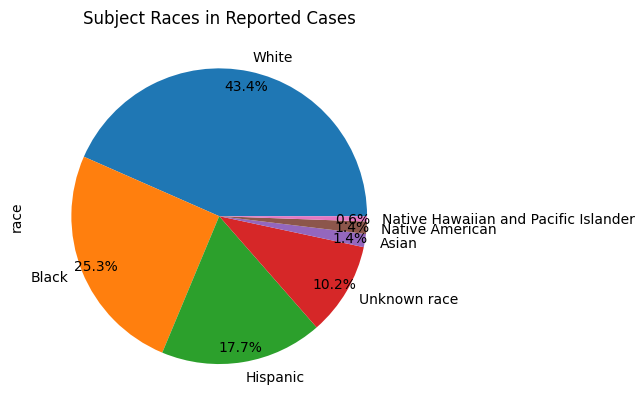

In [3]:
mpv_df['race'].value_counts().plot(kind = 'pie', 
                                       autopct = '%1.1f%%', 
                                       pctdistance = 0.9,
                                       title = "Subject Races in Reported Cases")
mpv_df.race.value_counts()

Allegedly Armed                       7622
Unarmed/Did Not Have Actual Weapon    1420
Unclear                                938
Vehicle                                653
Name: allegedly_armed, dtype: int64

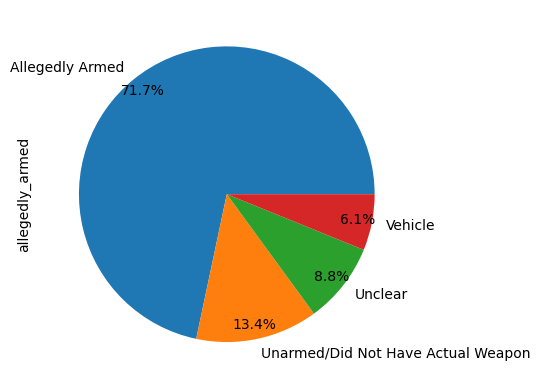

In [4]:
#Subject to Bias
mpv_df['allegedly_armed'].value_counts().plot(kind = 'pie', 
                                       autopct = '%1.1f%%', 
                                       pctdistance = 0.9)
mpv_df.allegedly_armed.value_counts()

<AxesSubplot:title={'center':'% of Cases with Calls for Service'}, ylabel='call_for_service'>

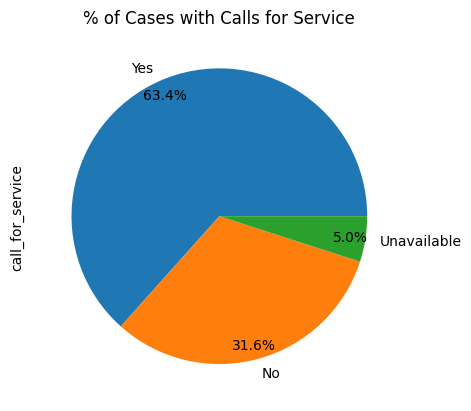

In [5]:
mpv_df['call_for_service'].value_counts().plot(kind = 'pie', 
                                       autopct = '%1.1f%%', 
                                       pctdistance = 0.9,
                                       title = "% of Cases with Calls for Service")

5.863636363636363

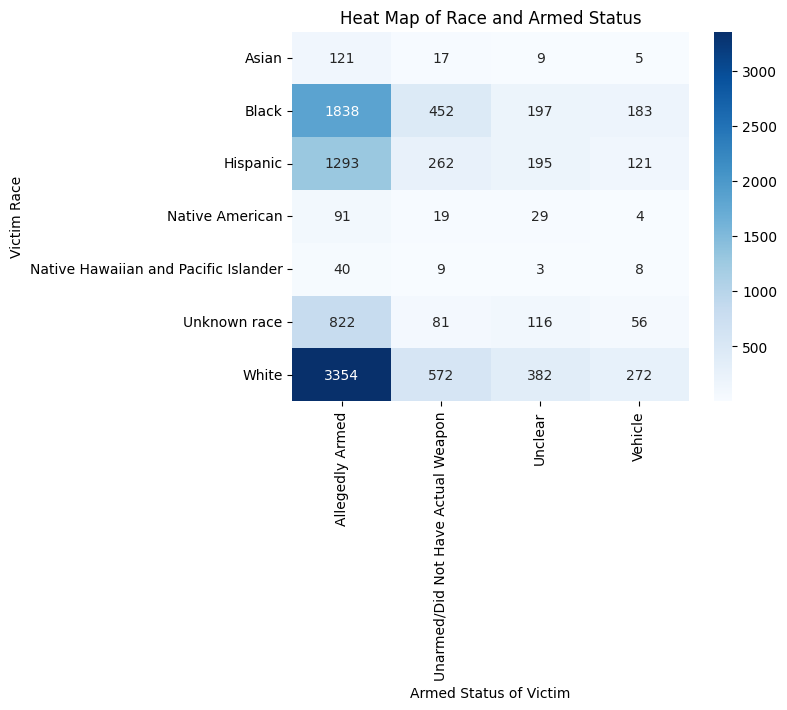

In [22]:
plot = sns.heatmap(mpv_df.groupby(['race', 'allegedly_armed']).size().unstack(),
            annot = True,
            cmap = 'Blues',
            fmt = 'g',
            )
plot.set(title = "Heat Map of Race and Armed Status", xlabel = 'Armed Status of Victim', ylabel = 'Victim Race')
plot

# 
# From this heat map, we see that there appears to be relationship between the race of the victim and the their armed status. 
# In particular, 
# 1838 / 452 = 4.066
# 1293 / 262 = 4.935
# 3354 / 572 = 5.864
# 121 / 17 = 7.118



In [14]:
series_year = mpv_df.year.value_counts()
series_year.array


<PandasArray>
[1149, 1146, 1140, 1105, 1099, 1094, 1087, 1070, 1049, 712]
Length: 10, dtype: int64

<AxesSubplot:ylabel='Frequency'>

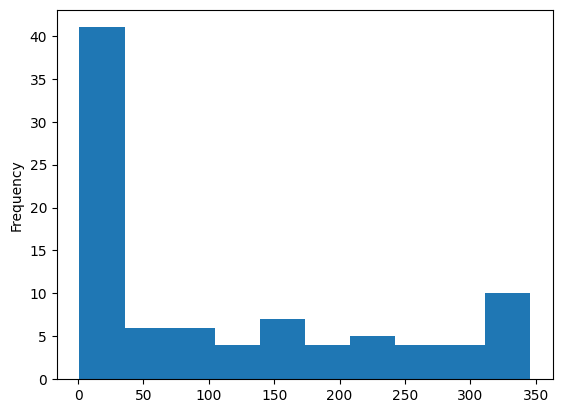

In [15]:
mpv_df['age'].value_counts().plot.hist()

In [8]:
# Attempting to generate heatmap of police killings per state in the US

us_map = gpd.read_file("s_22mr22.shp")

series_shooting_per_state = mpv_df.state.value_counts()
series_shooting_per_state


series_shooting_per_state.to_csv(index = False)

state_df = pd.read_csv(series_shooting_per_state)



TypeError: argument of type 'method' is not iterable